In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
#load the dataset into a pandas DataFrame
df  = pd.read_csv("cardio_train.csv", delimiter=";", index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#get the size of the dataset
df.shape

(70000, 12)

In [ ]:
#reduce the size of the dataset to only 1000 samples
df = df.iloc[0:1000, :]
df.shape

(1000, 12)

In [ ]:
#convert the age given in days to years
df['age'] = df['age']//365

In [ ]:
#separate the dataset into target variable and features
y = df['cardio']
X = df.drop(columns=['cardio'])

In [ ]:
#splitting the dataset into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression().fit(X_train, y_train)
lr_probabilities = lr.predict_proba(X_test)[:, 1]

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_probabilities = knn.predict_proba(X_test)[:, 1]

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt_probabilities = dt.predict_proba(X_test)[:, 1]

rf = RandomForestClassifier().fit(X_train, y_train)
rf_probabilities = rf.predict_proba(X_test)[:, 1]

svc = SVC(probability=True).fit(X_train, y_train)
svc_probabilities = svc.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

#AUC score and ROC curve for Logistic Regression
lr_auc = roc_auc_score(y_test, lr_probabilities)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probabilities)

#AUC score and ROC curve for K-Nearest Neighbors
knn_auc = roc_auc_score(y_test, knn_probabilities)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probabilities)

#AUC score and ROC curve for the Decision Tree Classifier
dt_auc = roc_auc_score(y_test, dt_probabilities)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probabilities)

#AUC score and ROC curve for the Random Forest Classifier
rf_auc = roc_auc_score(y_test, rf_probabilities)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probabilities)

#AUC score and ROC curve for The SVM Classifier
svc_auc = roc_auc_score(y_test, svc_probabilities)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_probabilities)

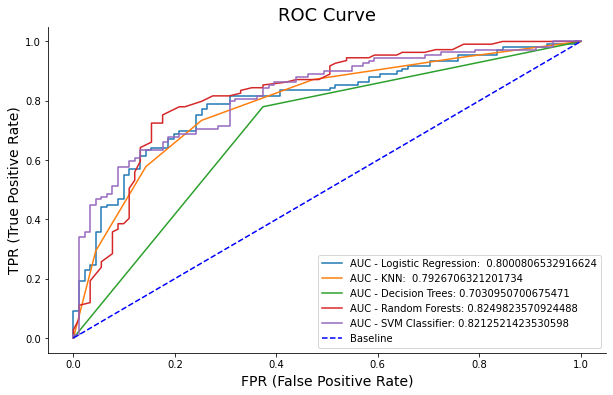

In [ ]:
#plots the ROC curves
plt.figure(figsize=(10, 6))

plt.plot(lr_fpr, lr_tpr, label=f"AUC - Logistic Regression:  {lr_auc}")
plt.plot(knn_fpr, knn_tpr, label=f"AUC - KNN:  {knn_auc}")
plt.plot(dt_fpr, dt_tpr, label=f"AUC - Decision Trees: {dt_auc}")
plt.plot(rf_fpr, rf_tpr, label=f"AUC - Random Forests: {rf_auc}")
plt.plot(svc_fpr, svc_tpr, label=f"AUC - SVM Classifier: {svc_auc}")

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline') #plot the baseline model, AUC of 0.5

plt.xlabel('FPR (False Positive Rate)', size=14)
plt.ylabel('TPR (True Positive Rate)', size=14)
plt.title('ROC Curve', size=18)
plt.legend()

plt.show()